<h2>Marion's Lab #1</h2>

In this lab, we will review basic Python commands for functions and graphs as used in the service learning examples.

<h4> Q1</h4>

a) Define a function called Bears(TDs,PATs,TWOPCs) which computes the points scored by the Chicago Bears in a game where
<ul>
    <li> TDs= number of touchdowns made (6 pts each)</li>
    <li> PATs=number of point after touchdowns (1 pt each) </li>
    <li> TWOPCs=number of 2 point conversions made </li>  
    

In [1]:
#Answer to Q1a)
def bears(tds, pats, twopcs):
    tds_score = tds * 6
    pats_score = pats
    twopcs_score = twopcs * 2
    score = tds_score + pats_score + twopcs_score
    return score

b) Check your answer to part a) by using your function to compute the number of points the ears scored in the 1940 championship in which they had 10 TDs and 6 PATs. 


In [2]:
#Answer to Q1b)
bears(10, 6, 0)

66

<h4> Q2</h4>
Make a Wordcloud of the book of Genesis.

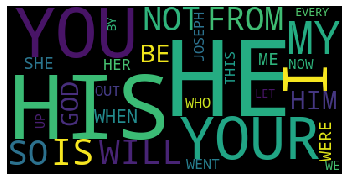

In [3]:
#Answer to Q2
#!pip install wordcloud #install the library. This only needs to be done once
import wordcloud
from matplotlib import pyplot as plt
#function to remove punctuation and uninteresting words, calculate frequencies of words,
#and create wordcloud
def calculate_frequencies(textfile):
    punctuations="!@#$%^&*()][_+-=\".,?/\\.,;:'-~1234567890"
    uninteresting_words=["AND","THE","A","OR","AN","BUT","IT","OF","IN","TO","ON"]
    import re
    fc1=str(textfile)
    fc2=fc1.split(' ')
    for i in range(len(fc2)): 
        fc2[i] = fc2[i].upper()
    #Remove punctuations and numbers
    fc3 = []
    for s in fc2:
        if not any([o in s for o in punctuations]):
            fc3.append(s)
    #Remove uninteresting words
    fc4=[]
    for s in fc3:
        if not any([o in s for o in uninteresting_words]):
            fc4.append(s)
    fc5=[]
    for s in fc4:
        if not any([o.lower() in s for o in uninteresting_words]):
            fc5.append(s) 
    while('' in fc5) : 
        fc5.remove('')
    import collections
    #count the frequency of each word
    fc6 = collections.Counter(fc5)
    #create wordcloud from the frequencies stored in fc6
    cloud = wordcloud.WordCloud(max_words = 30)  #can adjust the number of words
    cloud.generate_from_frequencies(fc6)
    return cloud.to_array()

with open('Genesis.txt','r') as file:  #read in the text file
    genesis_text = file.readlines()
    
genesisimage = calculate_frequencies(genesis_text) #create wordcloud image
plt.imshow(genesisimage, interpolation = 'nearest')
plt.axis('off') #hide axes
#plt.savefig('genesis_wordcloud.png', bbox_inches='tight')
plt.show() #display the image

<h4>Q3</h4>
Make a piechart of your budget.

Text(0.5, 1.0, 'Budget Breakdown Based on $400 Per Month')

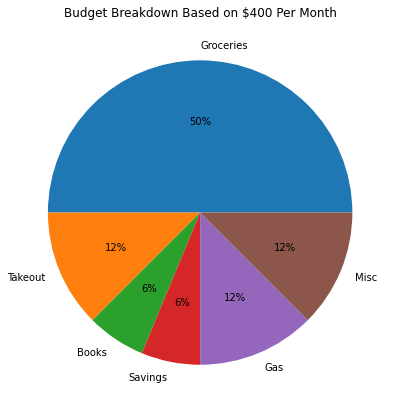

In [4]:
#Answer to Q3
#budget values in $USD
monthly_wage = 400
groceries = 200
takeout = 50
books = 25
savings = 25
gas = 50
misc = 50

#create pie chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
budget_items = ['Groceries', 'Takeout', 'Books', 'Savings', 'Gas', 'Misc']
budget = [200, 50, 25, 25, 50, 50]
total = monthly_wage
#use the line below to show values as amounts
#ax=plt.pie(budget,labels=budget_items,autopct=lambda p: '${:.0f}'.format(p * total / 100))
#use the line below to show values as percentages
ax=plt.pie(budget,labels=budget_items,autopct='%1.0f%%')
plt.gca().set_title('Budget Breakdown Based on $'+str(monthly_wage)+" Per Month")
#fig.savefig('MarionBudgetPercentages.png') #save the piechart to a file

<h4>Q4</h4>

Define a function CHICOVID() which outputs for each given Chicago zip code the population, percentage tested, and percentage deaths.

In [5]:
#Answer to Q4
import pandas as pd
import numpy as np
rawCOVID=pd.read_excel("COVID.xlsx")
#create new data frame including only the specified rows
COVID=pd.DataFrame(rawCOVID[['population','Test Rate - Cumulative','Death Rate - Cumulative','zip_code']])
COVID.dropna  #drop rows with missing data
COVID.columns=["population","test_rate","death_rate","zip"] #rename columns
#the test and death rates are per 100,000, so we divide the rates 
#by 1000 and round to 4 decimal places to convert to percentage
COVID['test_rate'] = COVID['test_rate'].div(1000).round(4)
COVID["death_rate"] = COVID['death_rate'].div(1000).round(4)
#print the zip, population, test rate, and death rate of the desired zipcode.
def chicovid(zip):
    alreadychecked=0  #eliminate duplication of information
    for z in COVID.index:  #go through all the index values
        if COVID.loc[z,"zip"]==zip and alreadychecked==0:    #found the zip we requested (first-time)
            alreadychecked=1  #we will only do this once
            df=COVID[COVID["zip"]==zip]
            max_population=df["population"].max()
            max_test_rate=df["test_rate"].max()
            max_death_rate=df["death_rate"].max()
            print("Zip code: "+str(zip))  #print zipcode
            print("The total population is "+str(max_population)+".")
            print("The cumulative test rate is "+ str(max_test_rate)+"%.")
            print("The cumulative death rate is "+ str(max_death_rate)+"%.")
    return ("Enter a different zip code if you wish.")
chicovid(60637) #enter your desired zip code here

Zip code: 60637
The total population is 47454.
The cumulative test rate is 21.6989%.
The cumulative death rate is 0.059%.


'Enter a different zip code if you wish.'

<h4>Q5</h4>

Add to a map of Chicago the COVID-19 data from Question 4  for North Lawndale (60623), Englewood (60621) and Woodlawn (60637).

In [6]:
#Answer to Q5
import folium # map rendering library
from folium.features import DivIcon #used to add popup info to a map
#create dataframe with only data for the desired zip codes
df_covid_map = COVID.loc[(COVID["zip"] == 60623) | (COVID["zip"] == 60621) | (COVID["zip"] == 60637)]
#create map starting zoomed in on Chicago
Chicago_covid_map = folium.Map(location=[41.886456, -87.62325],  tiles="CartoDB positron", zoom_start=10)
#array of latitudes for zip codes 60623, 60621, and 60637
latitudes = [41.8476, 41.7714, 41.7805]
#array of longitudes for zip codes 60623, 60621, and 60637
longitudes = [-87.7271, -87.6433, -87.6038]

#function to create a list of latitudes/longitudes that correspond with the zip code of
#each row in the data frame
def findlat(df, latlist):
    list = []
    for i in range(len(df)):
        if df.iloc[i, 3] == 60623:
            list.append(latlist[0])
        elif df.iloc[i, 3] == 60621:
            list.append(latlist[1])
        elif df.iloc[i, 3] == 60637:
            list.append(latlist[2])
    return list

#create list of latitudes that correspond to the zip code in each row using my new function
lat_list = findlat(df_covid_map, latitudes)
#attach the latitudes to the dataframe as a new column
df_covid_map.insert(4, 'Lat', lat_list)
#create list of longitudes that correspond to the zip code in each row using my new function
lon_list = findlat(df_covid_map, longitudes)
#attach the latitudes to the dataframe as a new column
df_covid_map.insert(5, 'Lon', lon_list)
#create new dataframe with the maximums for the zip code as the elements in each row

def dfmax(zip,df_new):
    alreadychecked=0  #eliminate duplication of information
    for z in df_covid_map.index:  #go through all the index values
        if df_covid_map.loc[z,"zip"]==zip and alreadychecked==0:    #found the zip we requested (first-time)
            alreadychecked=1  #we will only do this once
            df=df_covid_map[df_covid_map["zip"]==zip] #create new dataframe using only the parameter zip
            max_population=df["population"].max() #find the max of population in this dataframe
            max_test_rate=df["test_rate"].max() #find the max of test_rate in this dataframe
            max_death_rate=df["death_rate"].max() #find the max of death_rate in this dataframe
            lat = df["Lat"].max() #find the max of Lat in this dataframe
            lon = df["Lon"].max() #find the max of Lon in this dataframe
            #create a list of the maximums to add to the data frame as a new row
            row = [max_population, max_test_rate, max_death_rate, zip, lat, lon]
            #add the list to the new dataframe as a row
            df_new.loc[len(df_new)] = row
            
#create list of column empty columns for new dataframe
df_covid_map_max_names = {"population":[],"test_rate":[],"death_rate":[],"zip":[],"Lat":[],"Lon":[]}
#create new dataframe using the above column names
df_covid_map_max = pd.DataFrame(df_covid_map_max_names)
#add each desired zip code to the new dataframe
dfmax(60621, df_covid_map_max)
dfmax(60623, df_covid_map_max)
dfmax(60637, df_covid_map_max)
#convert all data in column "zip" to type int
df_covid_map_max.zip = df_covid_map_max.zip.astype(int)
#convert all data in column "population" to type int
df_covid_map_max.population = df_covid_map_max.population.astype(int)

#print the zip, population, test rate, and death rate of each zip code on the map at the
#corresponding latitude and longitude
for i in df_covid_map_max.index:
    p=[df_covid_map_max.loc[i,"Lat"],df_covid_map_max.loc[i,"Lon"]]
    folium.Marker(p,icon=DivIcon(
        icon_size=(110,0),
        icon_anchor=(0,8),
        html='<div style="font-size: 8pt; color : blue">'+"Zip: " + str(df_covid_map_max.loc[i,"zip"]) 
                                                               + "\nPopulation: " + 
                                                               str(df_covid_map_max.loc[i,"population"]) + 
                                                               "\nTest rate: " + 
                                                               str(df_covid_map_max.loc[i,"test_rate"]) + "%" + 
                                                               "\nDeath rate: " + 
                                                               str(df_covid_map_max.loc[i,"death_rate"]) + "%" + '</div>',
            )).add_to(Chicago_covid_map)
    Chicago_covid_map.add_child(folium.Marker(p, radius=1,color='blue'))
    
#display the map
Chicago_covid_map

<h4>Q6</h4>
Make a bar chart of the data for percentage deaths in Q5.

Text(0, 0.5, 'Death Rate (Percentage)')

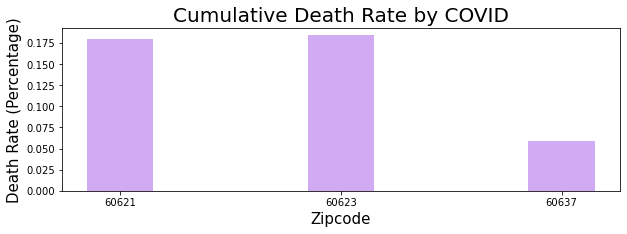

In [7]:
#Answer to Q6
fig=plt.figure(figsize=(10,3)) #creates a new figure
bar_positions=[1,2,3]  # Positions the 4 bars at x=1,2,3,4
bar_labels = df_covid_map_max["zip"]  #Labels the bars using the names in the "zip" column  
bar_heights=df_covid_map_max["death_rate"] #Bar heights are the numbers in the "death_rate" column
plt.bar(bar_positions, bar_heights, tick_label =bar_labels,width = 0.3,color='blueviolet',alpha=.4) #Create the bar chart
plt.title("Cumulative Death Rate by COVID",size=20) #adds a title to the plot
plt.xlabel('Zipcode',size=15) # Adds a name for the x-axis
plt.ylabel('Death Rate (Percentage)',size=15) # Adds a name for the y-axis
#fig.savefig("covid_death_rate_bar_chart.png") #saves the bar chart to a file

<h4> Q7 </h4>
Create a simple worship tune.

In [8]:
#Answer to Q7
import numpy as np
from IPython.display import Audio 
rest=0
do=261.625565 #set do to middle c
re=9/8*do
mi=5/4*do
fa=4/3*do
so=3/2*do
la=5/3*do
ti=15/8*do
do1=2*do
re1=2*9/8*do
mi1=2*5/4*do
fa1=2*4/3*do
so1=2*3/2*do
la1=2*5/3*do
ti1=2*15/8*do
do2=2*2*do
def play(song):
    song=np.array(song)
    framerate = 4100
    t = np.linspace(0, len(song) / 2, round(framerate * len(song) / 2))[:-1]
    song_idx = np.floor(t * 2).astype(int)
    data = np.sin(2 * np.pi * song[song_idx] * t)
    return Audio(data, rate=framerate, autoplay=True)
#play the song Highlands (Song of Ascent) by Hillsong
highlands = [so1, so1, so1, so1, mi1, so1, mi1, so1, so1, re1, re1, so1, so1, so1, la1, 
             la1, so1, so1, mi1, mi1, 
             re1, re1, do1, do1, rest, mi1, mi1, mi1, mi1, re1, re1, do1, do1, la, rest, 
             do1, do1, do1, re1, 
             re1, do1, ti, do1]
play(highlands)